<a href="https://colab.research.google.com/github/KNL1979/DS807/blob/main/Q2_AE_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Plots from AE latent space

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [ ]:
# lists with val_loss, val_mae, size of latent space, trainable parameters

LatentSpace = np.array([576, 1152, 288, 2304, 576, 576, 144, 4608, 1152, 1024, 256, 2048])
val_loss = np.array([0.01941, 0.01255, 0.02304, 0.007976, 0.01834, 0.01606, 0.02702, 0.003984, 0.01249, 0.01355, 0.02261, 0.007897])
val_mae = np.array([0.1015, 0.0812, 0.1109, 0.06525, 0.09806, 0.09162, 0.1218, 0.0462, 0.08069,0.08418, 0.1101, 0.06478])
trainableParameters = [3947, 13939, 15107, 52067, 56707, 203235, 277091, 200899, 798147, 52067, 203235, 200899]
labels = np.array([1, 3, 4, 5, 6, 7, 8, 9, 10 ,11, 12, 13])

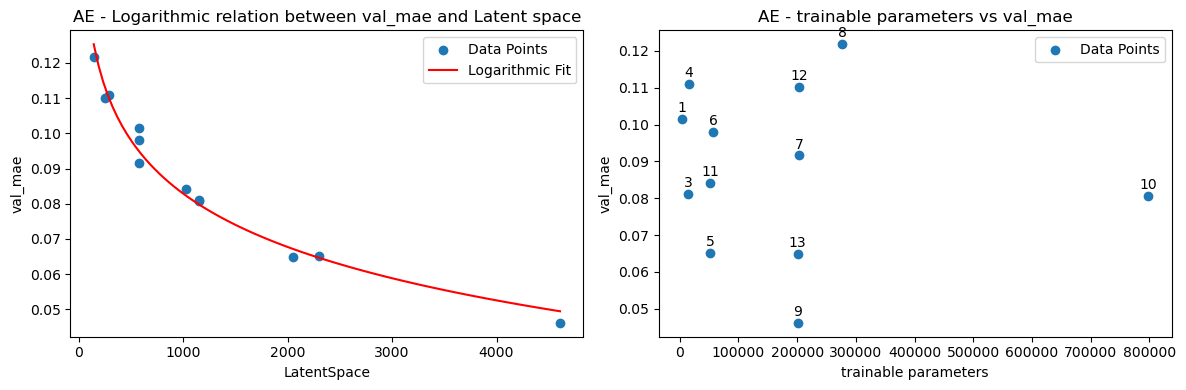

In [ ]:
# Define the logarithmic function to fit
def log_func(x, a, b):
    return a * np.log(x) + b

# Fit the function to the data
params_mae, covariance_mae = curve_fit(log_func, LatentSpace, val_mae)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Plot val_mae vs latent space
axs[0].scatter(LatentSpace, val_mae, label='Data Points')
x_fit_mae = np.linspace(min(LatentSpace), max(LatentSpace), 100)
y_fit_mae = log_func(x_fit_mae, *params_mae)
axs[0].plot(x_fit_mae, y_fit_mae, color='red', label='Logarithmic Fit')
axs[0].set_xlabel('LatentSpace')
axs[0].set_ylabel('val_mae')
axs[0].legend()
axs[0].set_title('AE - Logarithmic relation between val_mae and Latent space')

# Plot for val_mae vs trainable parameters
axs[1].scatter(trainableParameters, val_mae, label='Data Points')
for i, label in enumerate(labels):
    axs[1].annotate(label, (trainableParameters[i], val_mae[i]), textcoords="offset points", xytext=(0,5), ha='center')
axs[1].set_xlabel('trainable parameters')
axs[1].set_ylabel('val_mae')
axs[1].legend()
axs[1].set_title('AE - trainable parameters vs val_mae')

plt.tight_layout()
plt.show()